In [54]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 4.

This question consists of two parts:<br>
  1) swapping of the three R, G, B channels<br>
  2) image rotation and translation

In [55]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [56]:
def rgb_swap(img):
  '''
  write a program which creates three images with RGB channels swapped in each of the image. let the original image be BGR then the second and the third 
  output images should be RBG and GRB respectively. 

  Inputs:
  - img - original image

  Outputs: 
  - out_im1 - numpy array (of dtype np.uint8) containing the output image in BGR.
  - out_im2 - numpy array (of dtype np.uint8) containing the output image in RBG.
  - out_im3 - numpy array (of dtype np.uint8) containing the output image in GRB. 

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
  r = np.ones((img.shape[0], img.shape[1]), dtype=np.uint8) # Intialise the red channel matrix
  g = np.ones((img.shape[0], img.shape[1]), dtype=np.uint8) # Intialise the green channel matrix
  b = np.ones((img.shape[0], img.shape[1]), dtype=np.uint8) # Intialise the blue channel matrix
  out_img1 = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
  out_img2 = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
  out_img3 = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  out_img1[:,:,0]=b
  out_img1[:,:,1]=g
  out_img1[:,:,2]=r
  out_img2[:,:,0]=r
  out_img2[:,:,1]=b
  out_img2[:,:,2]=g
  out_img3[:,:,0]=g
  out_img3[:,:,1]=r
  out_img3[:,:,2]=b
  #out_img1 = cv2.merge((b,g,r))
  #out_img2 = cv2.merge((r,b,g))
  #out_img3 = cv2.merge((g,r,b))
  out_images = [out_img1, out_img2, out_img3]
  #############################
  # End your code here ########
  #############################    
  return np.uint8(out_images) 

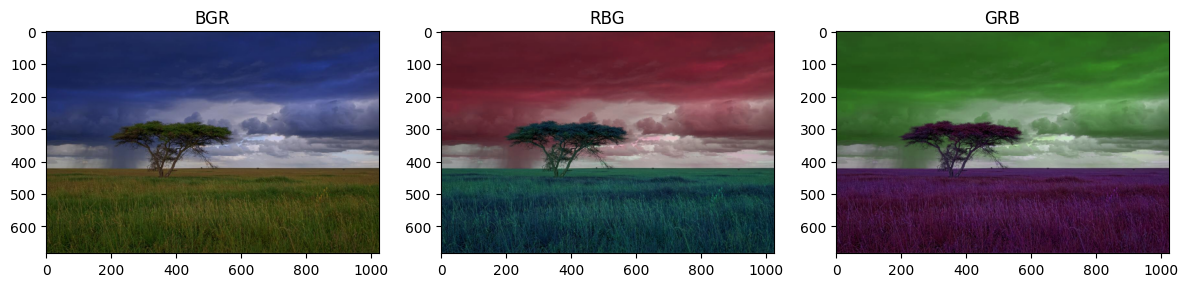

In [57]:
## Test run

## Write a script which runs the above function for the given image and plot the different images in a pyplot subplot observing the changes.
im = cv2.imread('q2im1.jpg')
output = rgb_swap(im)
plt.figure(figsize=[12,8], dpi=100)
plt.subplot(2, 3, 1);plt.title("BGR")
plt.imshow(output[0]);
plt.subplot(2, 3, 2);plt.title("RBG")
plt.imshow(output[1]);
plt.subplot(2, 3, 3);plt.title("GRB")
plt.imshow(output[2]);
plt.tight_layout()


In [58]:
def transform_image(img, shift, theta):
  '''
  write a program which translate and rotates a white square of size 100x100 pixels. First create an image of size 512x512 pixels having black background 
  and a square of size 100x100 in the center of the image. now write a code which shifts the square by given pixel value and rotates it counter clockwise by 
 T given angle theta.

  Inputs:
  - img - original image
  - shift - a 2x1 array having the pixel shift value in x direction and y direction
  - theta - angle of rotation in degrees in counter clockwise direction

  Outputs: 
  - out_im - numpy array (of dtype np.uint8) containing the output image.

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
  # Translation
  if (shift[0]<0):
    start1 =0
    end1 = 512+shift[0]
    start3 =-shift[0]
    end3 = 512
  else :
    start1 =shift[0]
    end1 = 512
    start3 =0
    end3 = 512-shift[0]
  if (shift[1]<0):
    start2 =0
    end2 = 512+shift[1]
    start4 =-shift[1]
    end4 = 512
  else :
    start2 =shift[1]
    end2 = 512
    start4 =0
    end4 = 512-shift[1]
  out_img = np.zeros((512, 512) ,dtype=np.uint8)
  out_img[start1:end1,start2:end2] = img[start3:end3,start4:end4]
  # print(start1,start2,start3,start4,end1,end2,end3,end4)
  # Rotation
  rotated_image = np.zeros((out_img.shape[0],out_img.shape[1]),dtype=np.uint8)
  mid_row = int((out_img.shape[0]+1)/2)
  mid_col = int((out_img.shape[1]+1)/2)
  for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
      #  Apply rotation matrix
      y = round(((i-mid_col)*math.cos((theta*np.pi)/180) + (j-mid_row)*math.sin((theta*np.pi)/180)) + mid_row)
      x = round((-(i-mid_col)*math.sin((theta*np.pi)/180) + (j-mid_row)*math.cos((theta*np.pi)/180)) + mid_col)
      if (x >= 0 and y >= 0 and x < out_img.shape[1] and y < out_img.shape[0]):
        rotated_image[i][j] = out_img[y][x]

  #############################
  # End your code here ########
  #############################    

  return np.uint8(rotated_image)

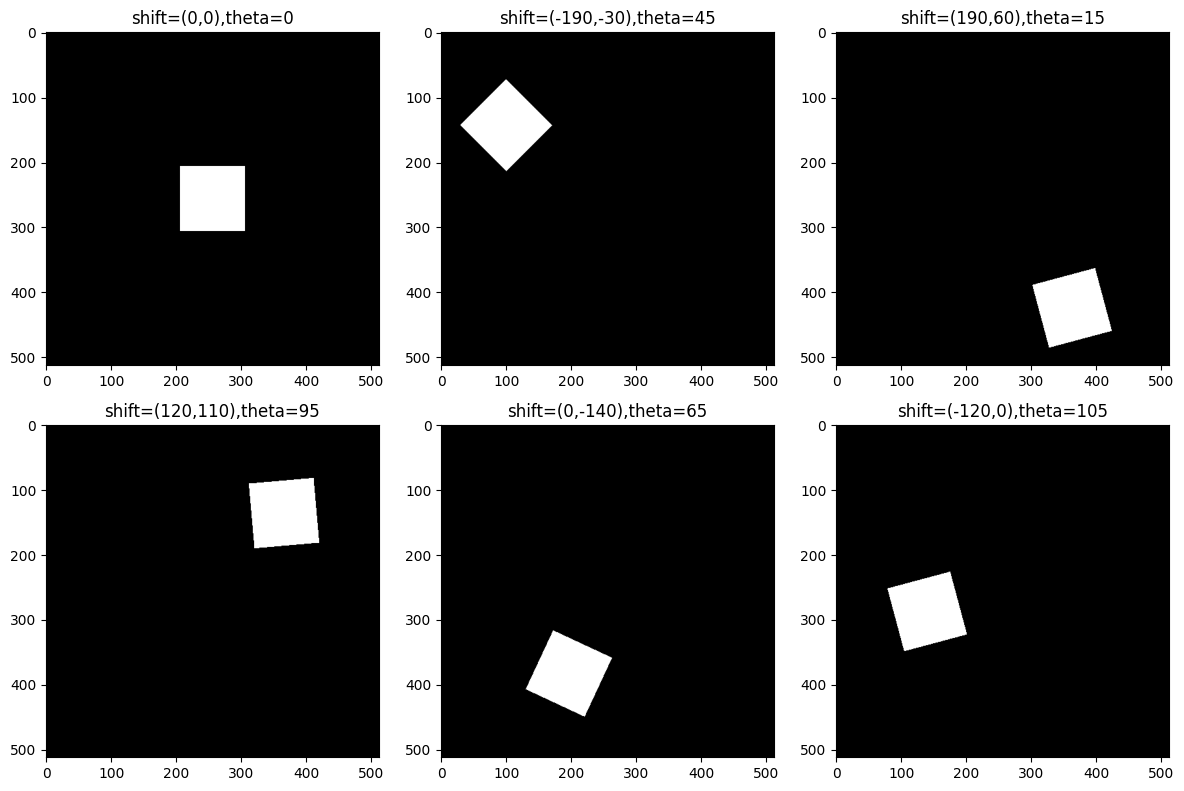

In [68]:
# Write a script which tests your function for atleast 5 different combinations of rotation and translation
img = np.zeros((512, 512), dtype=np.uint8)
img[206:306,206:306] = 255
output1 = transform_image(img, [0,0], 0)
output2 = transform_image(img, [-190,-30], 45)
output3 = transform_image(img, [190,60], 15)
output4 = transform_image(img, [120,110], 95)
output5 = transform_image(img, [0,-140], 65)
output6 = transform_image(img, [-120,0], 105)


plt.figure(figsize=[12,8], dpi=100)
plt.subplot(2, 3, 1); plt.title("shift=(0,0),theta=0")
plt.imshow(output1, cmap='gray');
plt.subplot(2, 3, 2);plt.title("shift=(-190,-30),theta=45")
plt.imshow(output2, cmap='gray');
plt.subplot(2, 3, 3);plt.title("shift=(190,60),theta=15")
plt.imshow(output3, cmap='gray');
plt.subplot(2, 3, 4);plt.title("shift=(120,110),theta=95")
plt.imshow(output4, cmap='gray');
plt.subplot(2, 3, 5);plt.title("shift=(0,-140),theta=65")
plt.imshow(output5, cmap='gray');
plt.subplot(2, 3, 6);plt.title("shift=(-120,0),theta=105")
plt.imshow(output6, cmap='gray');
plt.tight_layout()



